# Lab 9 Report: 
## Final Project Codebase

## Project Title: Same as your poster title

### Group Members:

--------------------

## Prepare Data

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

y = pd.read_csv('emotions.csv')
y=y.to_numpy()

x = y[:,:-1]
y = y[:,-1]

for i in range(y.shape[0]):
    if y[i]=="NEGATIVE":
        y[i]=0
    elif y[i]=="NEUTRAL":
        y[i]=1
    else:
        y[i]=2
print(y)

scaler = StandardScaler()
training_features = scaler.fit_transform(x)

print(x.shape)
print(y.shape)


x_train = training_features[:1800]
y_train = y[:1800].astype(int)

x_validation = training_features[1800:2000]
y_validation = y[1800:2000].astype(int)
x_test = training_features[2000:]
y_test = y[2000:].astype(int)

[0 1 2 ... 0 0 1]
(2132, 2548)
(2132,)


## Define Model

In [2]:
class moodClassifierFCN(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim):
        super(moodClassifierFCN, self).__init__()
        
        self.layer1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.layer2 = torch.nn.Linear(hidden1_dim, hidden2_dim)
        self.layer3 = torch.nn.Linear(hidden2_dim, output_dim)
        
    def forward(self,x):
        out1 = torch.nn.functional.relu(self.layer1(x))
        out2 = torch.nn.functional.relu(self.layer2(out1))
        output = self.layer3(out2)
        
        return output

## Define Hyperparameters

In [3]:
model = moodClassifierFCN(2548, 3, 512, 64)

epochs = 40
learning_rate = 0.01


loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Identify Tracked Values

In [4]:
train_loss_list = []
validation_accuracy_list = []

## Train Model

In [8]:
train_inputs = torch.from_numpy(x_train).float()
train_targets = torch.from_numpy(y_train).long()

validation_inputs = torch.from_numpy(x_validation).float()
validation_targets = torch.from_numpy(y_validation).long()

test_inputs = torch.from_numpy(x_test).float()
test_targets = torch.from_numpy(y_test).long()


for epoch in range(epochs):
    optimizer.zero_grad()
    
    train_outputs = model(train_inputs)
    
    loss = loss_func(train_outputs, train_targets)
    
    train_loss_list.append(loss.item())
    
    loss.backward()
    
    optimizer.step()
    
    with torch.no_grad():
        validation_outputs = model(validation_inputs)
        correct = (torch.argmax(validation_outputs, dim=1) == validation_targets).type(torch.FloatTensor)
        
        validation_accuracy_list.append(correct.mean())
        
    print("Epoch " + str(epoch) + " validation accuracy: " + str(validation_accuracy_list[epoch]))

Epoch 0 validation accuracy: tensor(0.3250)
Epoch 1 validation accuracy: tensor(0.3950)
Epoch 2 validation accuracy: tensor(0.6750)
Epoch 3 validation accuracy: tensor(0.7700)
Epoch 4 validation accuracy: tensor(0.6000)
Epoch 5 validation accuracy: tensor(0.5900)
Epoch 6 validation accuracy: tensor(0.7200)
Epoch 7 validation accuracy: tensor(0.7250)
Epoch 8 validation accuracy: tensor(0.4950)
Epoch 9 validation accuracy: tensor(0.8300)
Epoch 10 validation accuracy: tensor(0.8950)
Epoch 11 validation accuracy: tensor(0.6500)
Epoch 12 validation accuracy: tensor(0.9300)
Epoch 13 validation accuracy: tensor(0.9150)
Epoch 14 validation accuracy: tensor(0.8650)
Epoch 15 validation accuracy: tensor(0.8600)
Epoch 16 validation accuracy: tensor(0.8800)
Epoch 17 validation accuracy: tensor(0.8350)
Epoch 18 validation accuracy: tensor(0.8050)
Epoch 19 validation accuracy: tensor(0.8050)
Epoch 20 validation accuracy: tensor(0.8350)
Epoch 21 validation accuracy: tensor(0.8450)
Epoch 22 validation 

## Visualize & Evaluate Model

tensor(0.9545)


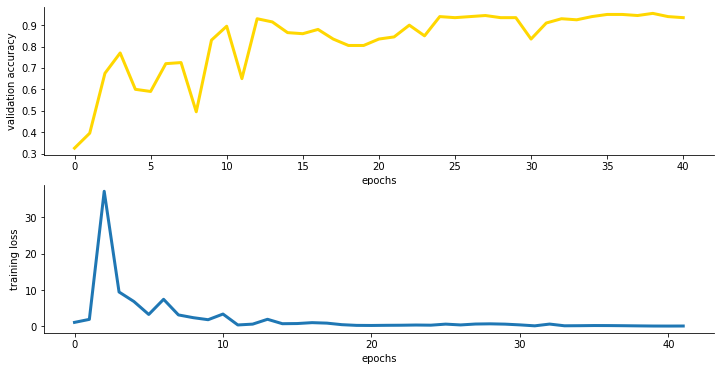

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(validation_accuracy_list, linewidth=3, color="gold")
plt.ylabel("validation accuracy")
plt.xlabel("epochs")

plt.subplot(2, 1, 2)
plt.plot(train_loss_list, linewidth=3)
plt.ylabel("training loss")
plt.xlabel("epochs")
sns.despine()



with torch.no_grad():
    test_outputs = model(test_inputs)
    correct = (torch.argmax(test_outputs, dim=1) == test_targets).type(torch.FloatTensor)

    print(correct.mean())